In [0]:
!pip show tensorflow
!pip install tensorflow==1.14

Name: tensorflow
Version: 2.2.0rc2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, gast, grpcio, wrapt, tensorboard, opt-einsum, astunparse, wheel, tensorflow-estimator, keras-preprocessing, h5py, termcolor, six, google-pasta, absl-py, scipy, protobuf
Required-by: fancyimpute
     |████████████████████████████████| 109.2MB 97kB/s 
     |████████████████████████████████| 491kB 30.5MB/s 
     |████████████████████████████████| 3.2MB 38.6MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensor

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 1810 images belonging to 2 classes.
Found 850 images belonging to 2 classes.
Epoch 1/10
113/113 [==============================] - 157s 1s/step - loss: 0.3305 - acc: 0.8634 - val_loss: 0.3225 - val_acc: 0.8844
Epoch 2/10
113/113 [==============================] - 158s 1s/step - loss: 0.1502 - acc: 0.9441 - val_loss: 0.4517 - val_acc: 0.8465
Epoch 3/10
113/113 [==============================] - 157s 1s/step - loss: 0.1443 - acc: 0.9569 - val_loss: 0.3092 - val_acc: 0.9161
Epoch 4/10
113/113 [==============================] - 158s 1s/step - loss: 0.1151 - acc: 0.9624 - val_loss: 0.1155 - val_acc: 0.9580
Epoch 5/10
113/113 [==============================] - 160s 1s/step - loss: 0.1084 - acc: 0.9646 - val_loss: 0.1881 - val_acc: 0.9460
Epoch 6/10
113/113 [==============================] - 160s 1s/step - loss: 0.1139 - acc: 0.9602 - val_loss: 0.3613 - val_acc: 0.8573
Epoch 7/10
113/113 [==============================] - 158s 1s/step - loss: 0.0962 - acc: 0.9596 - val_loss: 0.1055 - va

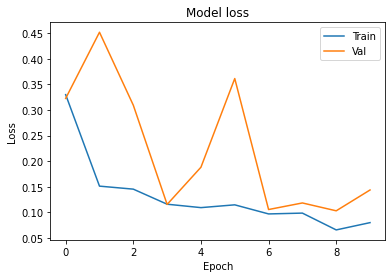

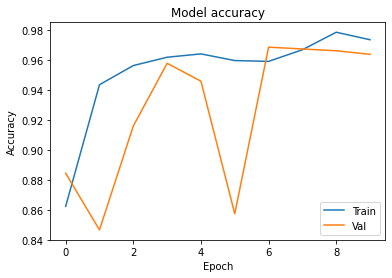

In [0]:
# highly overfitted model
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

import matplotlib.pyplot as plt

train_data_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Train'
validation_data_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Test'
#test_data_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =1810
nb_validation_samples = 850
epochs = 10
batch_size = 16
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
#model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
model.compile(loss='binary_crossentropy', 
			optimizer='rmsprop', 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1. / 255, 
	shear_range=0.2, 
	zoom_range=0.2, 
	horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_data_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_data_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 
 
hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 

#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


Using TensorFlow backend.


Found 1810 images belonging to 2 classes.


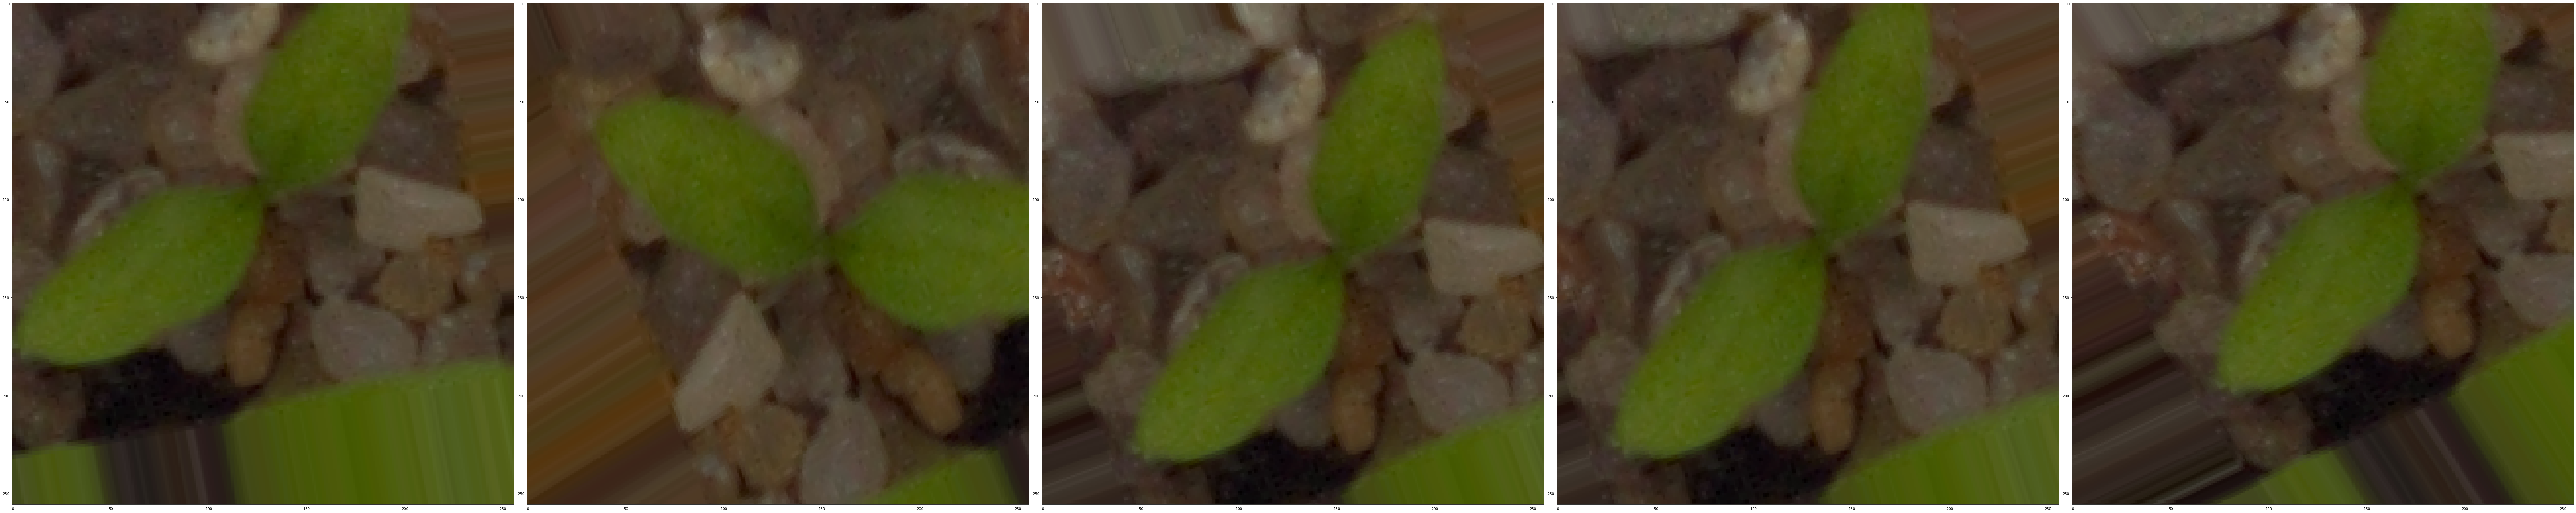

In [1]:
# data augmentation to help us in removing overfitting

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_width=256
img_height=256
train_data_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Train'
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(100,100))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img/255)
    plt.tight_layout()
    plt.show()
train_generator = train_datagen.flow_from_directory( 
	train_data_dir, 
	target_size=(img_width, img_height), 
	batch_size=16, 
	)
augmented_images = [train_generator[0][0][0] for i in range(5)]
plotImages(augmented_images)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Found 1810 images belonging to 2 classes.
Found 850 images belonging to 2 classes.
Epoch 1/10
36/36 [==============================] - 148s 4s/step - loss: 11.1277 - acc: 0.6211 - val_loss: 1.5554 - val_acc: 0.5882
Epoch 2/10
36/36 [==============================] - 145s 4s/step - loss: 0.7977 - acc: 0.7317 - val_loss: 0.6368 - val_acc: 0.6553
Epoch 3/10
36/36 [==============================] - 147s 4s/step - loss: 0.4767 - acc: 0.8928 - val_loss: 0.6163 - val_acc: 0.7929
Epoch 4/10
36/36 [==============================] - 142s 4s/step - loss: 0.4975 - acc: 0.9133 - val_loss: 0.5260 - val_acc: 0.9271
Epoch 5/10
36/36 [==============================] - 144s 4s/step - loss: 0.5028 - acc: 0.9144 - val_loss: 0.6538 - val_acc: 0.9000
Epoch 6/10
36/36 [==============================] - 143s 4s/step - loss: 0.5848 - acc: 0.9184 - val_loss: 0.4764 - val_acc: 0.9353
Epoch 7/10
36/3

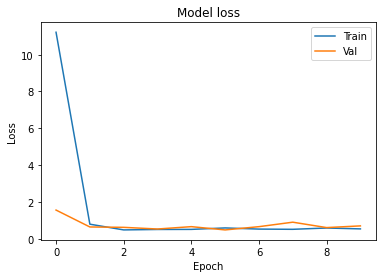

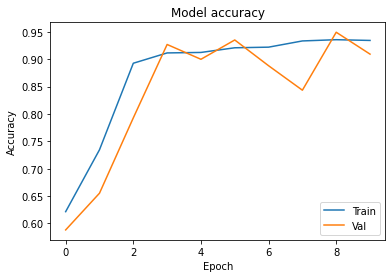

In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used adam optimizer
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =1810
nb_validation_samples = 850
epochs = 10
batch_size = 50
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
model.compile(loss='binary_crossentropy', 
			optimizer='adam', 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


Found 1810 images belonging to 2 classes.
Found 850 images belonging to 2 classes.
Epoch 1/10
36/36 [==============================] - 149s 4s/step - loss: 17.8951 - acc: 0.6088 - val_loss: 2.1776 - val_acc: 0.5882
Epoch 2/10
36/36 [==============================] - 146s 4s/step - loss: 1.0715 - acc: 0.6460 - val_loss: 0.7245 - val_acc: 0.5882
Epoch 3/10
36/36 [==============================] - 148s 4s/step - loss: 0.6661 - acc: 0.6394 - val_loss: 0.6820 - val_acc: 0.5882
Epoch 4/10
36/36 [==============================] - 149s 4s/step - loss: 0.6505 - acc: 0.6455 - val_loss: 0.6845 - val_acc: 0.5882
Epoch 5/10
36/36 [==============================] - 149s 4s/step - loss: 0.6651 - acc: 0.6263 - val_loss: 0.6811 - val_acc: 0.5882
Epoch 6/10
36/36 [==============================] - 148s 4s/step - loss: 0.6572 - acc: 0.6344 - val_loss: 0.6805 - val_acc: 0.5882
Epoch 7/10
36/36 [==============================] - 141s 4s/step - loss: 0.6449 - acc: 0.6554 - val_loss: 0.6850 - val_acc: 0.5882

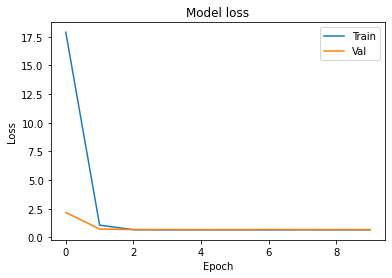

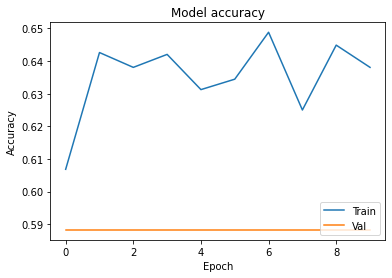

In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used adam optimizer with learning rate 0.01
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras.optimizers import adam
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =1810
nb_validation_samples = 850
epochs = 10
batch_size = 50
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
opt=adam(lr=0.01)
model.compile(loss='binary_crossentropy', 
			optimizer=opt, 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


Found 1810 images belonging to 2 classes.
Found 850 images belonging to 2 classes.
Epoch 1/10
36/36 [==============================] - 151s 4s/step - loss: 11.3761 - acc: 0.6040 - val_loss: 1.6479 - val_acc: 0.5882
Epoch 2/10
36/36 [==============================] - 151s 4s/step - loss: 0.8793 - acc: 0.6387 - val_loss: 0.7436 - val_acc: 0.5882
Epoch 3/10
36/36 [==============================] - 149s 4s/step - loss: 0.7417 - acc: 0.7638 - val_loss: 0.9441 - val_acc: 0.7976
Epoch 4/10
36/36 [==============================] - 144s 4s/step - loss: 0.7947 - acc: 0.8905 - val_loss: 0.9188 - val_acc: 0.8753
Epoch 5/10
36/36 [==============================] - 144s 4s/step - loss: 0.9037 - acc: 0.9200 - val_loss: 0.9745 - val_acc: 0.8941
Epoch 6/10
36/36 [==============================] - 144s 4s/step - loss: 1.1777 - acc: 0.9184 - val_loss: 1.2865 - val_acc: 0.8800
Epoch 7/10
36/36 [==============================] - 146s 4s/step - loss: 0.8370 - acc: 0.9389 - val_loss: 0.7090 - val_acc: 0.9106

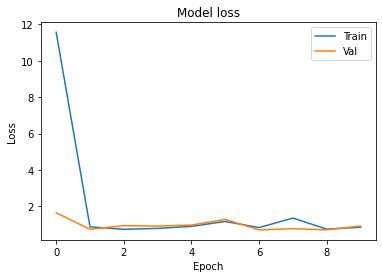

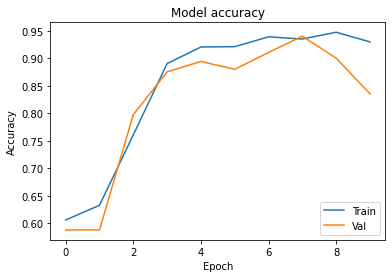

In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used adam optimizer with learning rate 0.005
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras.optimizers import adam
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =1810
nb_validation_samples = 850
epochs = 10
batch_size = 50
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
opt=adam(lr=0.005)
model.compile(loss='binary_crossentropy', 
			optimizer=opt, 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


Found 1810 images belonging to 2 classes.
Found 850 images belonging to 2 classes.
Epoch 1/10
36/36 [==============================] - 154s 4s/step - loss: 2098.1840 - acc: 0.4009 - val_loss: 183.5945 - val_acc: 0.4118
Epoch 2/10
36/36 [==============================] - 153s 4s/step - loss: 67.7988 - acc: 0.3860 - val_loss: 15.0850 - val_acc: 0.4118
Epoch 3/10
36/36 [==============================] - 152s 4s/step - loss: 43633.1661 - acc: 0.6138 - val_loss: 71974.8070 - val_acc: 0.5882
Epoch 4/10
36/36 [==============================] - 152s 4s/step - loss: 60574.9499 - acc: 0.6345 - val_loss: 46939.5528 - val_acc: 0.5882
Epoch 5/10
36/36 [==============================] - 152s 4s/step - loss: 36625.9176 - acc: 0.6373 - val_loss: 27442.7366 - val_acc: 0.5882
Epoch 6/10
36/36 [==============================] - 152s 4s/step - loss: 21338.7990 - acc: 0.6356 - val_loss: 15927.7347 - val_acc: 0.5882
Epoch 7/10
36/36 [==============================] - 152s 4s/step - loss: 14004.7984 - acc: 0

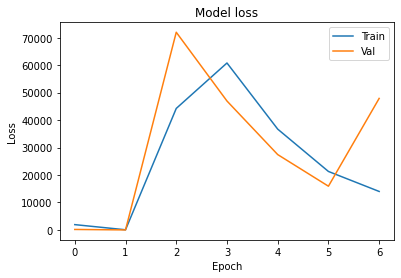

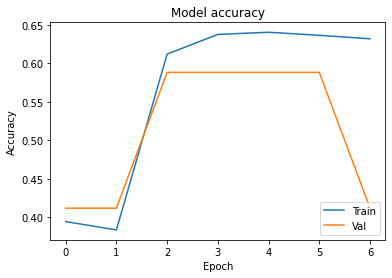

In [0]:
# tried to reduce overfitting by introducing l2 regularizer and dropout function
# also improved the performance of model using data augmentation
# used adam optimizer with learning rate 0.1
# importing libraries 

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import regularizers
from keras.optimizers import adam
from keras import backend as K 


import matplotlib.pyplot as plt

train_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Train'
validation_dir = '/content/drive/My Drive/DatasetForMAchineLearningProject/seedlingDataset/Test'
#test_dir="/content/drive/My Drive/DatasetForMAchineLearningProject/healthDataset/Test"
nb_train_samples =1810
nb_validation_samples = 850
epochs = 10
batch_size = 50
img_width=256
img_height=256
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#checking format of image i.e checking whether RGB channel coming last or first
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 
 
#now creating the model
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.7))) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

#now compiling the model
opt=adam(lr=0.1)
model.compile(loss='binary_crossentropy', 
			optimizer=opt, 
			metrics=['accuracy']) 

# using data generator
train_datagen = ImageDataGenerator( 
	rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
	train_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

validation_generator = test_datagen.flow_from_directory( 
	validation_dir, 
	target_size=(img_width, img_height), 
	batch_size=batch_size, 
	class_mode='binary') 

hist=model.fit_generator( 
	train_generator, 
	steps_per_epoch=nb_train_samples // batch_size, 
	epochs=epochs, 
	validation_data=validation_generator, 
	validation_steps=nb_validation_samples // batch_size,callbacks=[early_stopping_monitor]) 
#showing loss in form of graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
#showing accuracy in form of graph
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
